In [486]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [487]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [488]:
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [489]:
df = pd.read_csv("flags.txt")
df.sample(5).T

,45,30,99,144,43
Name,Czechoslovakia,Cameroon,Liberia,San-Marino,Cuba
Landmass,3,4,4,3,1
Zone,1,1,4,1,4
Area,128,474,111,0,115
Population,15,8,1,0,10
Language,5,3,10,6,2
Religion,6,1,5,0,6
Bars,0,3,0,0,0
Stripes,0,0,11,2,5
Colors,3,3,3,2,3


### Data Information

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        194 non-null    object
 1   Landmass    194 non-null    int64 
 2   Zone        194 non-null    int64 
 3   Area        194 non-null    int64 
 4   Population  194 non-null    int64 
 5   Language    194 non-null    int64 
 6   Religion    194 non-null    int64 
 7   Bars        194 non-null    int64 
 8   Stripes     194 non-null    int64 
 9   Colors      194 non-null    int64 
 10  Red         194 non-null    int64 
 11  Green       194 non-null    int64 
 12  Blue        194 non-null    int64 
 13  Gold        194 non-null    int64 
 14  White       194 non-null    int64 
 15  Black       194 non-null    int64 
 16  Orange      194 non-null    int64 
 17  Mainhue     194 non-null    object
 18  Circles     194 non-null    int64 
 19  Crosses     194 non-null    int64 
 20  Saltires  

In [491]:
df.describe()

,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,...,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


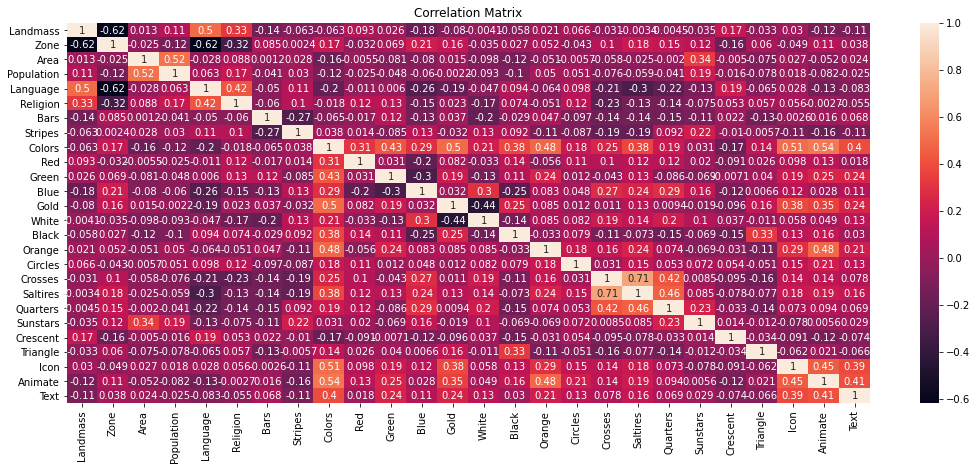

In [492]:
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix")
plt.show()

### Data Insights

**Biggest Countries by Landmass**

In [493]:
cl = df[["Name", "Area", "Population", "Language", "Religion"]].sort_values(by = "Area", ascending = False).head(10)
cl

,Name,Area,Population,Language,Religion
184,USSR,22402,274,5,6
31,Canada,9976,24,1,1
37,China,9561,1008,7,6
183,USA,9363,231,1,1
23,Brazil,8512,119,6,0
10,Australia,7690,15,1,1
81,India,3268,684,6,4
8,Argentina,2777,28,2,0
9,Argentine,2777,28,2,0
162,Sudan,2506,20,8,2


**Biggest Countries by Population**

In [494]:
cp = df[["Name", "Area", "Population", "Language", "Religion"]].sort_values(by = "Population", ascending = False).head(10)
cp

,Name,Area,Population,Language,Religion
37,China,9561,1008,7,6
81,India,3268,684,6,4
184,USSR,22402,274,5,6
183,USA,9363,231,1,1
82,Indonesia,1904,157,10,2
23,Brazil,8512,119,6,0
90,Japan,372,118,9,7
14,Bangladesh,143,90,6,2
132,Pakistan,804,84,6,2
112,Mexico,1973,77,2,0


**Biggest Countries by Languages**

In [495]:
cl = df[["Name", "Area", "Population", "Language", "Religion"]].sort_values(by = "Language", ascending = False).head(10)
cl

,Name,Area,Population,Language,Religion
0,Afghanistan,648,16,10,2
99,Liberia,111,1,10,5
113,Micronesia,1,0,10,1
109,Marianas,0,0,10,1
108,Malta,0,0,10,0
106,Maldive-Islands,0,0,10,2
105,Malaysia,333,13,10,2
104,Malawi,118,6,10,5
103,Malagasy,587,9,10,1
98,Lesotho,30,1,10,5


**Biggest Countries by Religion**

In [496]:
cr = df[["Name", "Area", "Population", "Language", "Religion"]].sort_values(by = "Religion", ascending = False).head(10)
cr

,Name,Area,Population,Language,Religion
171,Togo,57,2,3,7
86,Israel,21,4,10,7
154,South-Korea,99,39,10,7
90,Japan,372,118,9,7
64,Germany-DDR,108,17,4,6
128,North-Korea,121,18,10,6
26,Bulgaria,111,9,5,6
45,Czechoslovakia,128,15,5,6
43,Cuba,115,10,2,6
1,Albania,29,3,6,6


### Data Preparation to predict Landmass

In [497]:
data = df[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles","Crosses","Saltires","Quarters","Sunstars","Crescent","Triangle"]]

In [498]:
labels = df["Landmass"]

### Split Data into Training and Testing  

In [499]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.3, random_state = 3)

**Find  Best Tree Depth for Landmass**

In [500]:
tree_array = []
for x in range(1, 10):
    Tree = DecisionTreeClassifier(max_depth = x)
    Tree.fit(x_train, y_train)
    yhat = Tree.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    tree_array.append(accuracy)
np.array(tree_array[0:5])

array([0.25423729, 0.40677966, 0.42372881, 0.40677966, 0.42372881])

In [501]:
# Best Depth Index and Best Depth Accuracy
best_depth = tree_array.index(max(tree_array))
print("Best Depth Index =", best_depth)
print("Best Depth Accuracy =", tree_array[best_depth])

Best Depth Index = 2
Best Depth Accuracy = 0.423728813559322


**Find Best K Nearest Neighbor for landmass**

In [502]:
k_array = []
for n in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    yhat = knn.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    k_array.append(accuracy)
np.array(k_array[0:5])

array([0.25423729, 0.33898305, 0.3220339 , 0.28813559, 0.28813559])

In [503]:
# best k index and k score
best_k = k_array.index(max(k_array)) 
print("Best K Index =", best_k)
print("Best K Value =", k_array[best_k])

Best K Index = 6
Best K Value = 0.3559322033898305


**Find Best Support Vector Classifier for Landmass**

In [504]:
svc = []
kernels = ["linear", "poly", "rbf", "sigmoid"]
for k in kernels:
    clf = svm.SVC(kernel = k)
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    svc.append(accuracy)
svm_accuracy = {"linear": svc[0],
                "poly": svc[1],
                "rbf": svc[2],
                "sigmoid": svc[3]}
svm_accuracy

{'linear': 0.3898305084745763,
 'poly': 0.23728813559322035,
 'rbf': 0.2542372881355932,
 'sigmoid': 0.23728813559322035}

In [505]:
print("Best SVM =", max(svm_accuracy.items(), key = lambda x: x[1]))

Best SVM = ('linear', 0.3898305084745763)


**Logistic Regressipon for landmass**

In [506]:
logistic_solvers = ["liblinear", "lbfgs", "newton-cg", "sag", "saga"]
average = ["micro", "macro", "weighted"]
Accuracy = []
for y in average:
    for x in logistic_solvers:
        LR = LogisticRegression(C = 0.01, solver = x)
        LR.fit(x_train, y_train)
        yhat = LR.predict(x_test)
        jaccard = jaccard_score(y_test, yhat, average = y)
        Accuracy.append(jaccard)
print(Accuracy[0:5])

[0.14563106796116504, 0.12380952380952381, 0.12380952380952381, 0.12380952380952381, 0.12380952380952381]


In [507]:
# best index and score
best_lr = Accuracy.index(max(Accuracy)) 
print("Best K Index =", best_lr)
print("Best K Value =", Accuracy[best_lr])

Best K Index = 0
Best K Value = 0.14563106796116504


**Use Decision Tree Classifier for landmass prediction**

In [508]:
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(x_train, y_train)
yhat = tree.predict(x_test)

### Actual vs Predicted

In [509]:
ap = pd.DataFrame({"Actual": y_test, "Predicted": yhat})
ap[0:5]

,Actual,Predicted
34,4,4
25,5,3
14,5,4
82,6,3
109,6,5


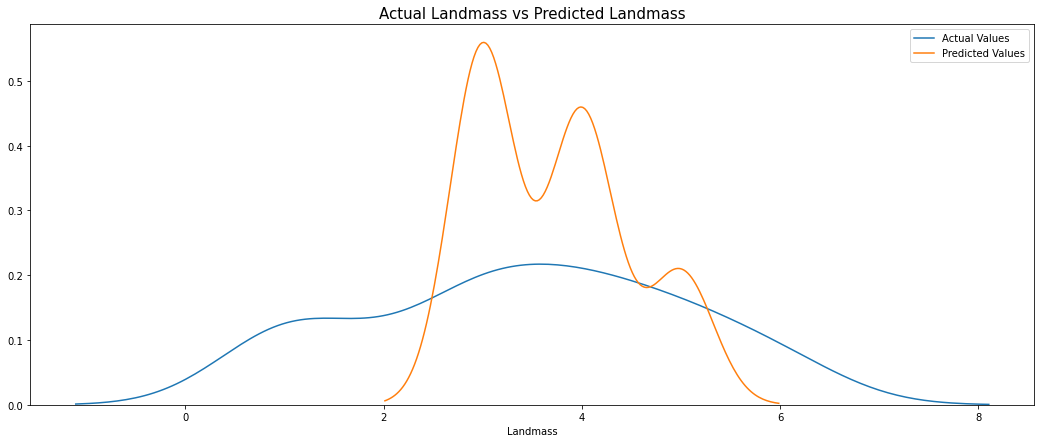

In [513]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = x_test, x = y_test, label = "Actual Values")
sns.kdeplot(data = x_test, x = yhat, label = "Predicted Values")
plt.title("Actual Landmass vs Predicted Landmass", size = 15)
plt.ylabel(None)
plt.legend()
plt.show()

### Data Prediction to predict Religion by flags

In [514]:
X = df[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles","Crosses","Saltires","Quarters","Sunstars","Crescent","Triangle"]]
y = df["Religion"]

**Train Test Split**

In [515]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

**K Nearest Neighbours Claffification**

In [516]:
k_array = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    yhat = knn.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    k_array.append(accuracy)
k_array[0:5]

[0.3389830508474576,
 0.3559322033898305,
 0.3050847457627119,
 0.3220338983050847,
 0.3728813559322034]

In [517]:
# Best K value
best_k = k_array.index(max(k_array))
print("Best K Index =", best_k)
print("Best K Value =", k_array[best_k])

Best K Index = 13
Best K Value = 0.4406779661016949


**Best Tree Depth to predict religion**

In [518]:
tree_array = []
for x in range(1, 50):
    Tree = DecisionTreeClassifier(max_depth = x)
    Tree.fit(x_train, y_train)
    yhat = Tree.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    tree_array.append(accuracy)
np.array(tree_array[0:5])

array([0.28813559, 0.42372881, 0.47457627, 0.40677966, 0.44067797])

In [519]:
# Best Tree value
best_tree = tree_array.index(max(tree_array))
print("Best K Index =", best_tree)
print("Best K Value =", tree_array[best_tree])

Best K Index = 2
Best K Value = 0.4745762711864407


**Find Best Support Vector Classifier for Religion**

In [520]:
svc = []
kernels = ["linear", "poly", "rbf", "sigmoid"]
for k in kernels:
    clf = svm.SVC(kernel = k)
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    svc.append(accuracy)
svm_accuracy = {"linear": svc[0],
                "poly": svc[1],
                "rbf": svc[2],
                "sigmoid": svc[3]}
svm_accuracy

{'linear': 0.3559322033898305,
 'poly': 0.3389830508474576,
 'rbf': 0.4067796610169492,
 'sigmoid': 0.3559322033898305}

In [521]:
print("Best SVM =", max(svm_accuracy.items(), key = lambda x: x[1]))

Best SVM = ('rbf', 0.4067796610169492)


### Use Decision Tree Classifier to predict Religion

In [522]:
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(x_train, y_train)
yhat = tree.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": yhat}).head()

,Actual,Predicted
34,5,2
25,2,0
14,2,2
82,2,0
109,1,0


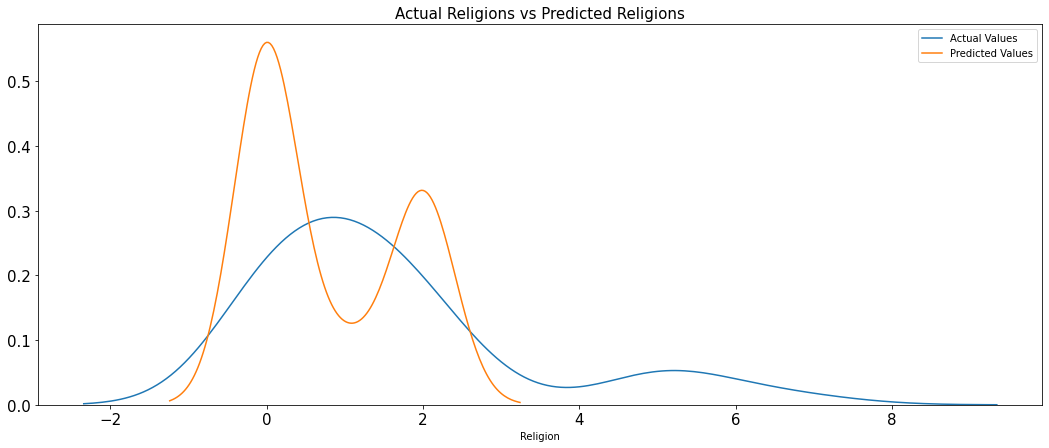

In [523]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = x_test, x = y_test, label = "Actual Values")
sns.kdeplot(data = x_test, x = yhat, label = "Predicted Values")
plt.title("Actual Religions vs Predicted Religions", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel(None)
plt.legend()
plt.show()